Notes:

Section 3.1 - Churn prediction project (https://www.slideshare.net/AlexeyGrigorev/ml-zoomcamp-3-machine-learning-for-classification)

The project aims to identify customers that are likely to churn or stoping to use a service. Each customer has a score associated with the probability of churning. Considering this data, the company would send an email with discounts or other promotions to avoid churning.

The ML strategy applied to approach this problem is binary classification, which for one instance can be expressed as:
g(xi) = yi


In the formula, yi is the model's prediction and belongs to {0,1}, being 0 the negative value or no churning, and 1 the positive value or churning. The output corresponds to the likelihood of churning.

In brief, the main idea behind this project is to build a model with historical data from customers and assign a score of the likelihood of churning.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("/Users/giovanni/Downloads/Telco-Customer-Churn.csv")
len(df)

7043

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == 'yes').astype(int)

In [5]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [6]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [7]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)

/Users/giovanni/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [8]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

0.8034066713981547

Section 4.2 - Accuracy and dummy model

Accurcy measures the fraction of correct predictions. Specifically, it is the number of correct predictions divided by the total number of predictions.

We can change the decision threshold, it should not be always 0.5. But, in this particular problem, the best decision cutoff, associated with the hightest accuracy (80%), was indeed 0.5.

Note that if we build a dummy model in which the decision cutoff is 1, so the algorithm predicts that no clients will churn, the accuracy would be 73%. Thus, we can see that the improvement of the original model with respect to the dummy model is not as high as we would expect.

Therefore, in this problem accuracy can not tell us how good is the model because the dataset is unbalanced, which means that there are more instances from one category than the other. This is also known as class imbalance.

Classes and methods:

* np.linspace(x,y,z) - returns a numpy array starting at x until y with a z step
* Counter(x) - collection class that counts the number of instances that satisfy the x condition
* accuracy_score(x, y) - sklearn.metrics class for calculating the accuracy of a model, given a predicted x dataset and a target y dataset.

### Accuracy and dummy model

In [9]:
len(y_val)

1409

In [10]:
(y_val == churn_decision).mean()

0.8034066713981547

In [11]:
1132/1409

0.8034066713981547

In [12]:
from sklearn.metrics import accuracy_score

thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.274
0.05 0.510
0.10 0.591
0.15 0.666
0.20 0.710
0.25 0.738
0.30 0.760
0.35 0.773
0.40 0.785
0.45 0.792
0.50 0.803
0.55 0.801
0.60 0.795
0.65 0.786
0.70 0.766
0.75 0.744
0.80 0.735
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


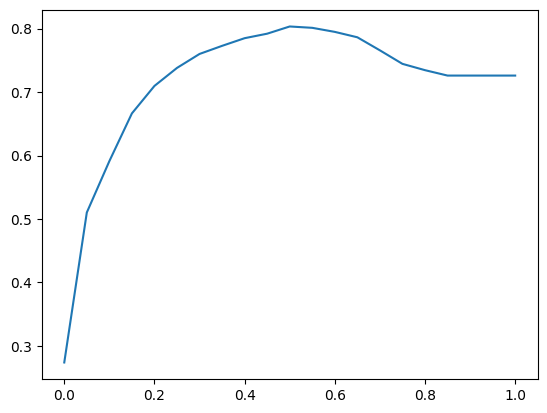

In [13]:
plt.plot(thresholds, scores)

In [14]:
accuracy_score(y_val, y_pred >= 0.5)

0.8034066713981547

In [15]:
from collections import Counter

In [16]:
Counter(y_pred >= 1.0)

Counter({False: 1409})

In [17]:
Counter(y_val)

Counter({0: 1023, 1: 386})

In [18]:
1 - y_val.mean()

0.7260468417317246

Section 4.3 - Confusion table

Confusion table is a way to measure different types of errors and correct decisions that binary classifiers can made. Considering this information, it is possible evaluate the quality of the model by different strategies.

If we predict the probability of churning from a customer, we have the following scenarios:

* No churn - Negative class
    * Customer did not churn - True Negative (TN)
    * Customer churned - False Negative (FN)
* Churn - Positive class
    * Customer churned - True Positive (TP)
    * Customer did not churn - False Positive (FP)

The confusion table help us to summarize the measures explained above in a tabular format, as is shown below:

* Actual/Predictions	Negative	Postive
* Negative	TN	FP
* Postive	FN	TP

The accuracy corresponds to the sum of TN and TP divided by the total of observations.

### Confusion table

In [19]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [20]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [21]:
predict_positive[:5]

array([False, False, False,  True, False])

In [22]:
actual_positive[:5]

array([False, False, False,  True, False])

In [23]:
(predict_positive & actual_positive).sum()

210

In [24]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

In [25]:
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [26]:
tp, tn

(210, 922)

In [27]:
fp, fn

(101, 176)

In [28]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])

In [29]:
confusion_matrix

array([[922, 101],
       [176, 210]])

In [30]:
confusion_matrix / confusion_matrix.sum()

array([[0.6543648 , 0.07168204],
       [0.12491128, 0.14904187]])

In [31]:
confusion_matrix / confusion_matrix.sum() * 100

array([[65.43647977,  7.1682044 ],
       [12.49112846, 14.90418737]])

Section 4.4 - Precision and recall

Precision tell us the fraction of positive predictions that are correct. It takes into account only the positive class (TP and FP - second column of the confusion matrix), as is stated in the following formula:

* TP / (TP + FP)

Recall measures the fraction of correctly identified postive instances. It considers parts of the postive and negative classes (TP and FN - second row of confusion table). The formula of this metric is presented below:

* TP / (TP + FN)

In this problem, the precision and recall values were 67% and 54% respectively. So, these measures reflect some errors of our model that accuracy did not notice due to the class imbalance.

### Precision and recall

In [32]:
(tp + tn) / (tp + tn + fn + fp)

0.8034066713981547

In [33]:
p = tp / (tp + fp)
p

0.6752411575562701

In [34]:
tp

210

In [35]:
tp + fp

311

In [36]:
r = tp / (tp + fn)
r

0.5440414507772021

In [37]:
tp + fn

386

In [38]:
tp

210

Section 4.5 - ROC Curves

ROC stands for Receiver Operating Characteristic, and this idea was applied during the Second World War for evaluating the strenght of radio detectors. This measure considers False Positive Rate (FPR) and True Postive Rate (TPR), which are derived from the values of the confusion matrix.

FPR is the fraction of false positives (FP) divided by the total number of negatives (FP and TN - the first row of confusion matrix), and we want to minimize it. The formula of FPR is the following:

* FP / (TN + FP)

In the other hand, TPR or Recall is the fraction of true positives (TP) divided by the total number of positives (FN and TP - second row of confusion table), and we want to maximize this metric. The formula of this measure is presented below:

* TP / (TP + FN)

ROC curves consider Recall and FPR under all the possible thresholds. If the threshold is 0 or 1, the TPR and Recall scores are the opposite of the threshold (1 and 0 respectively), but they have different meanings, as we explained before.

We need to compare the ROC curves against a point of reference to evaluate its performance, so the corresponding curves of random and ideal models are required. It is possible to plot the ROC curves with FPR and Recall scores vs thresholds, or FPR vs Recall.

Classes and methods:

* np.repeat([x,y], [z,w]) - returns a numpy array with a z number of x values, and a w number of y values.
* roc_curve(x, y) - sklearn.metrics class for calculating the false positive rates, true positive rates, and thresholds, given a target x dataset and a predicted y dataset.

### ROC Curves

#### TPR and FRP

In [39]:
tpr = tp / (tp + fn)
tpr

0.5440414507772021

In [41]:
fpr = fp / (fp + tn)
fpr

0.09872922776148582

In [53]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, fn, tn))

In [54]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

In [55]:
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,386,1023,0,0
10,0.1,366,556,20,467
20,0.2,333,356,53,667
30,0.3,284,236,102,787
40,0.4,249,166,137,857
50,0.5,210,101,176,922
60,0.6,150,53,236,970
70,0.7,75,19,311,1004
80,0.8,13,1,373,1022
90,0.9,0,0,386,1023


In [56]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

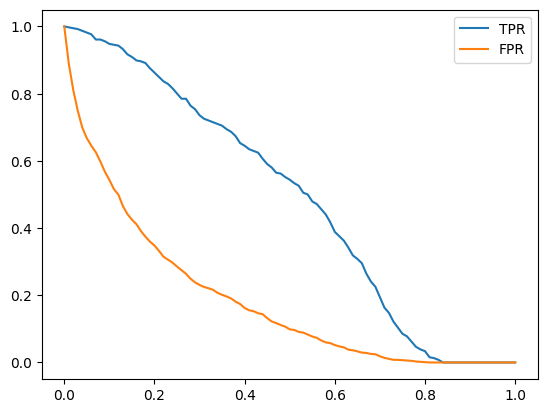

In [57]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
plt.legend()

#### Random model

In [58]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))


In [60]:
((y_rand >= 0.5) == y_val).mean()

0.5017743080198722

In [61]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
    
    return df_scores

In [62]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)

In [63]:
df_rand[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,347,923,39,100,0.898964,0.902248
20,0.2,307,822,79,201,0.795337,0.803519
30,0.3,276,724,110,299,0.715026,0.707722
40,0.4,237,624,149,399,0.613990,0.609971
50,0.5,202,518,184,505,0.523316,0.506354
60,0.6,161,409,225,614,0.417098,0.399804
70,0.7,121,302,265,721,0.313472,0.295210
80,0.8,78,206,308,817,0.202073,0.201369
90,0.9,40,101,346,922,0.103627,0.098729


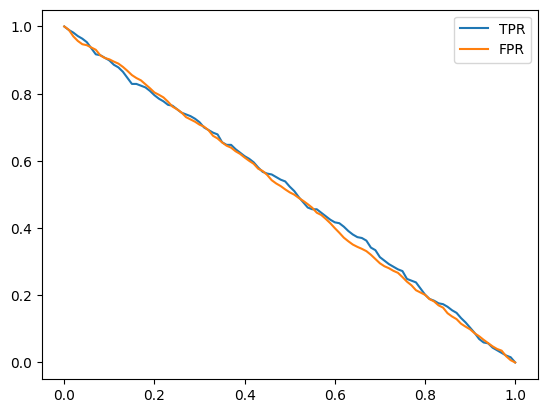

In [64]:
plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR')
plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR')
plt.legend()

#### Ideal model

In [65]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

(1023, 386)

In [66]:
y_ideal = np.repeat([0, 1], [num_neg, num_pos])

In [67]:
y_ideal

array([0, 0, 0, ..., 1, 1, 1])

In [68]:
y_ideal_pred = np.linspace(0, 1, len(y_val))

In [69]:
1 - y_val.mean()

0.7260468417317246

In [70]:
((y_ideal_pred >= 0.726) == y_ideal).mean()

1.0

In [71]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)
df_ideal

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.00,386,1023,0,0,1.000000,1.000000
1,0.01,386,1008,0,15,1.000000,0.985337
2,0.02,386,994,0,29,1.000000,0.971652
3,0.03,386,980,0,43,1.000000,0.957967
4,0.04,386,966,0,57,1.000000,0.944282
...,...,...,...,...,...,...,...
96,0.96,57,0,329,1023,0.147668,0.000000
97,0.97,43,0,343,1023,0.111399,0.000000
98,0.98,29,0,357,1023,0.075130,0.000000
99,0.99,15,0,371,1023,0.038860,0.000000


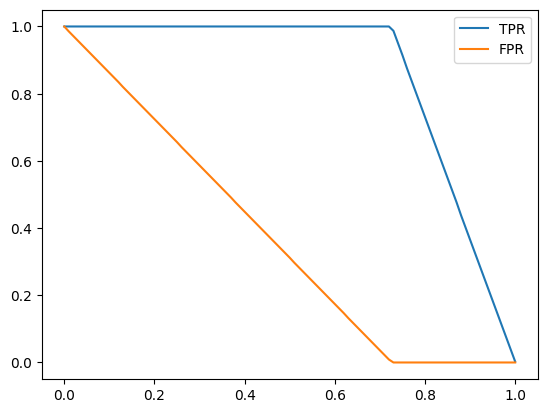

In [72]:
plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR')
plt.legend()

#### Putting everything together

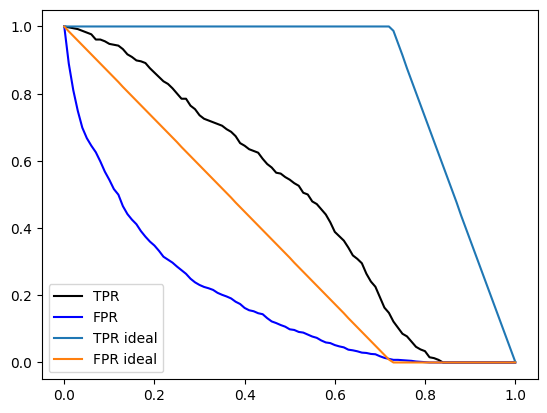

In [73]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR', color='black')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR', color='blue')

plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR ideal')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR ideal')

# plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR random', color='grey')
# plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR random', color='grey')

plt.legend()

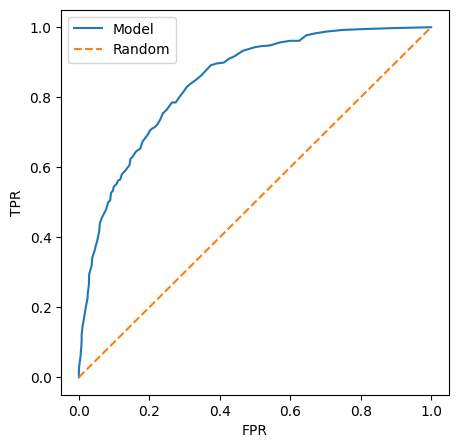

In [74]:
plt.figure(figsize=(5, 5))

plt.plot(df_scores.fpr, df_scores.tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

In [75]:
from sklearn.metrics import roc_auc_score, roc_curve

In [76]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

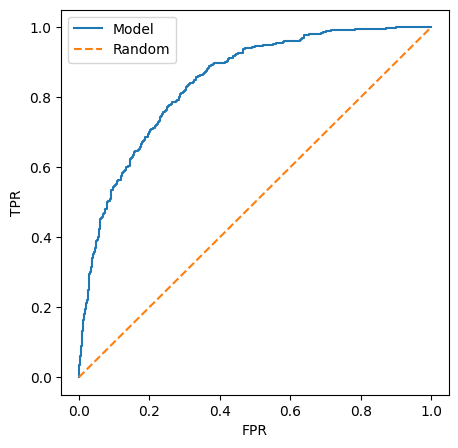

In [77]:
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

Section 4.6 - ROC AUC

The Area under the ROC curves can tell us how good is our model with a single value. The AUROC of a random model is 0.5, while for an ideal one is 1.

In ther words, AUC can be interpreted as the probability that a randomly selected positive example has a greater score than a randomly selected negative example.

Classes and methods:

* auc(x, y) - sklearn.metrics class for calculating area under the curve of the x and y datasets. For ROC curves x would be false positive rate, and y true positive rate.
* roc_auc_score(x, y) - sklearn.metrics class for calculating area under the ROC curves of the x false positive rate and y true positive rate datasets.


### ROC AUC

In [78]:
from sklearn.metrics import auc

In [79]:
auc(fpr, tpr)

0.8439011542805627

In [80]:
auc(df_scores.fpr, df_scores.tpr)

0.8435871332411529

In [81]:
auc(df_ideal.fpr, df_ideal.tpr)

0.9999430203759136

In [82]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
auc(df_scores.fpr, df_scores.tpr)

0.8435871332411529

In [83]:
roc_auc_score(y_val, y_pred)

0.8439011542805627

In [84]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

In [85]:
import random

In [92]:
n = 10000
success = 0

for i in range(n):
    pos_ind = random.randint(0, len(pos) - 1)
    neg_ind = random.randint(0, len(neg) - 1)
    
    if pos[pos_ind] > neg[neg_ind]:
        success = success + 1
    
success / n

0.8443

In [93]:
n = 10000
pos_ind = np.random.randint(0, len(pos), size=n)
neg_ind = np.random.randint(0, len(neg), size=n)

In [94]:
pos[pos_ind] > neg[neg_ind]

array([False,  True,  True, ...,  True,  True,  True])

Section 4.7 - Cross-validation

Cross-validarions refers to evaluating the same model on different subsets of a dataset, getting the average prediction, and spread within predictions. This method is applied in the parameter tuning step, which is the process of selecting the best parameter.

In this algorithm, the full training dataset is divided into k partitions, we train the model in k-1 partiions of this dataset and evaluate it on the remaining subset. Then, we end up evaluating the model in all the k folds, and we calculate the average evaluation metric for all the folds.

In general, if the dataset is large, we should use the hold-out validation dataset strategy. In the other hand, if the dataset is small or we want to know the standard deviation of the model across different folds, we can use the cross-validation approach.

Libraries, classes and methods:

* Kfold(k, s, x) - sklearn.model_selection class for calculating the cross validation with k folds, s boolean attribute for shuffle decision, and an x random state
* Kfold.split(x) - sklearn.Kfold method for splitting the x dataset with the attributes established in the Kfold's object construction.
* for i in tqdm() - library for showing the progress of each i iteration in a for loop.

### Cross-validation

In [95]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [98]:
dv, model = train(df_train, y_train, C=0.001)

In [99]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [100]:
predict(df_val, dv, model)

array([0.02155921, 0.33135098, 0.33602112, ..., 0.26705435, 0.71907523,
       0.71942517])

In [101]:
from sklearn.model_selection import KFold

In [102]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [108]:
from tqdm.auto import tqdm

/Users/giovanni/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [109]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.churn.values
        y_val = df_val.churn.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

 14%|██████▍                                      | 1/7 [00:01<00:08,  1.49s/it]

C=0.001 0.825 +- 0.009


 29%|████████████▊                                | 2/7 [00:02<00:07,  1.42s/it]

C=0.01 0.840 +- 0.009


 43%|███████████████████▎                         | 3/7 [00:04<00:06,  1.56s/it]

C=0.1 0.841 +- 0.008


 57%|█████████████████████████▋                   | 4/7 [00:06<00:04,  1.67s/it]

C=0.5 0.840 +- 0.006


 71%|████████████████████████████████▏            | 5/7 [00:07<00:03,  1.62s/it]

C=1 0.840 +- 0.009


 86%|██████████████████████████████████████▌      | 6/7 [00:09<00:01,  1.62s/it]

C=5 0.841 +- 0.008


100%|█████████████████████████████████████████████| 7/7 [00:11<00:00,  1.61s/it]

C=10 0.842 +- 0.008


In [103]:
train_idx, val_idx = next(kfold.split(df_full_train))

In [104]:
len(train_idx), len(val_idx)

(5070, 564)

In [105]:
len(df_full_train)

5634

In [106]:
df_train = df_full_train.iloc[train_idx]
df_val = df_full_train.iloc[val_idx]

In [110]:
scores

[0.8441687403348745,
 0.8450805356906369,
 0.8333052378085491,
 0.8325825765811856,
 0.8525462018763139]

In [111]:
dv, model = train(df_full_train, df_full_train.churn.values, C=1.0)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

0.8572386167896259

Section 4.8 - Summary

General definitions:

* Metric: A single number that describes the performance of a model
* Accuracy: Fraction of correct answers; sometimes misleading
* Precision and recall are less misleading when we have class inbalance
* ROC Curve: A way to evaluate the performance at all thresholds; okay to use with imbalance
* K-Fold CV: More reliable estimate for performance (mean + std)

In brief, this weeks was about different metrics to evaluate a binary classifier. These measures included accuracy, confusion table, precision, recall, ROC curves(TPR, FRP, random model, and ideal model), and AUROC. Also, we talked about a different way to estimate the performance of the model and make the parameter tuning with cross-validation.

